# Analyzing meteorological variables

In this section we will explore the hydrometeorological and air pollution available variables in summer date of the "Campo de Marte" weather station in Jesús María, Lima.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data

In [126]:
# Read the csv
df1 = pd.read_csv('Campo-De-Marte--Lima_air_pollution.csv', delimiter = ";").replace('-',np.nan)
df2 = pd.read_csv('campo_de_marte.csv').replace('S/D', np.nan)
# Convert time data to datetime
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['AÑO/MES/DÍA'] + ' ' + df2['HORA'])
# Obtain non-join columns
var = df2[df2.columns.to_list()[2:]]
# Merge data
data =df1.merge(var,how = 'inner', on = 'date')
# Convert numeric data in float
data[data.columns.to_list()[1:]] = data[data.columns.to_list()[1:]].astype(float)
#Set index to date
data = data.set_index('date')
#Save dataframe
data.to_csv('merge_data.csv')

## NA Distribution

In [127]:
# Definimos una función en la cual podamos saber la cantidad de valores nulos por columna y su porcentaje
def dist_na(df):
    nas = []
    for column in df.columns.to_list():
        if df[str(column)].isnull().value_counts().shape[0] == 1:
            if df[str(column)].isnull().value_counts().index[0] == True:
                nas.append((df[str(column)].isnull().value_counts()[1],100))
            else:     
                nas.append((0,0))
        else:    
            nas.append((df[str(column)].isnull().value_counts()[1],
                       (df[str(column)].isnull().value_counts()[1]/df.shape[0])*100))
    na_data = pd.DataFrame(nas, columns = ['NA','Percent'], index = df.columns.to_list()).sort_values('NA', ascending = False) 
    return na_data

In [128]:
data.shape

(27132, 11)

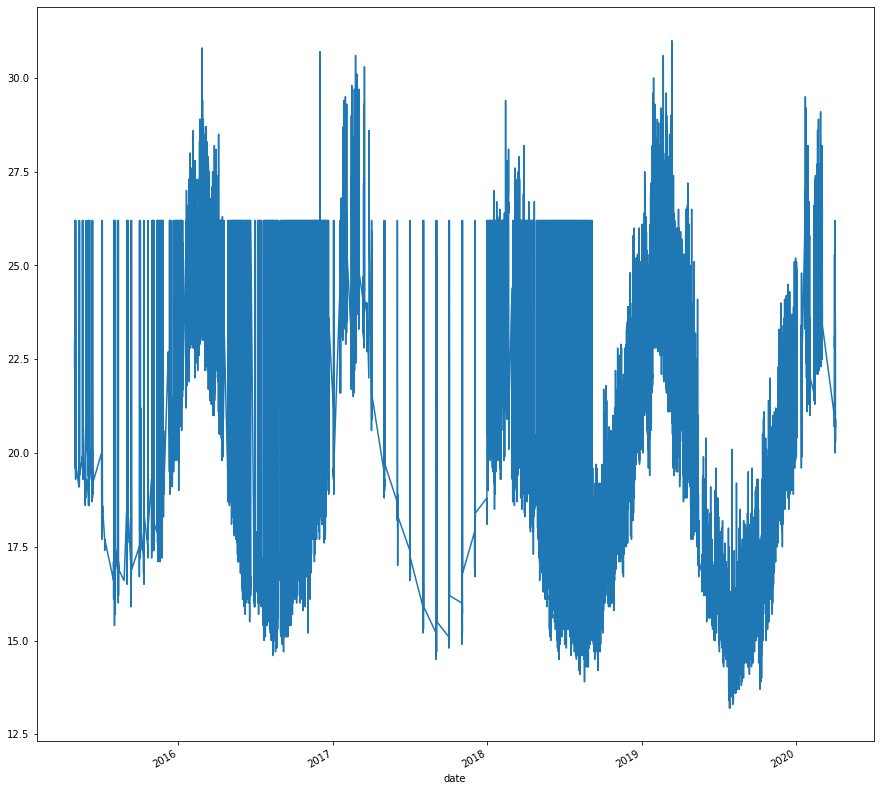

In [129]:
data['TEMPERATURA(°C)'].plot(figsize = (15,15))
plt.show()

## Cleaning data

Our missing data is classified by MCAR (missing- data completely at random). 

There are two main possible solutions: Multiple Imputation and Complete Cases (when the missing data percentage is about 10% or less). 

## Summer 2016

In [130]:
fecha_2 = pd.to_datetime(20163222300, format='%Y%m%d%H%M%S')
fecha_1 = pd.to_datetime(20151221000, format='%Y%m%d%H%M%S')
summer_2016 = data.loc[str(fecha_1):str(fecha_2)]

In [131]:
summer_2016['TEMPERATURA(°C)'].mean()

23.899045915324983

In [132]:
dist_na(summer_2016)

,NA,Percent
so2,772,46.007151
pm25,590,35.160906
co,262,15.613826
no2,183,10.905840
pm10,25,1.489869
o3,9,0.536353
TEMPERATURA(°C),1,0.059595
PRECIPITACIÓN(mm/hora),1,0.059595
HUMEDAD(%),1,0.059595
DIRECCIONDELVIENTO(°),1,0.059595


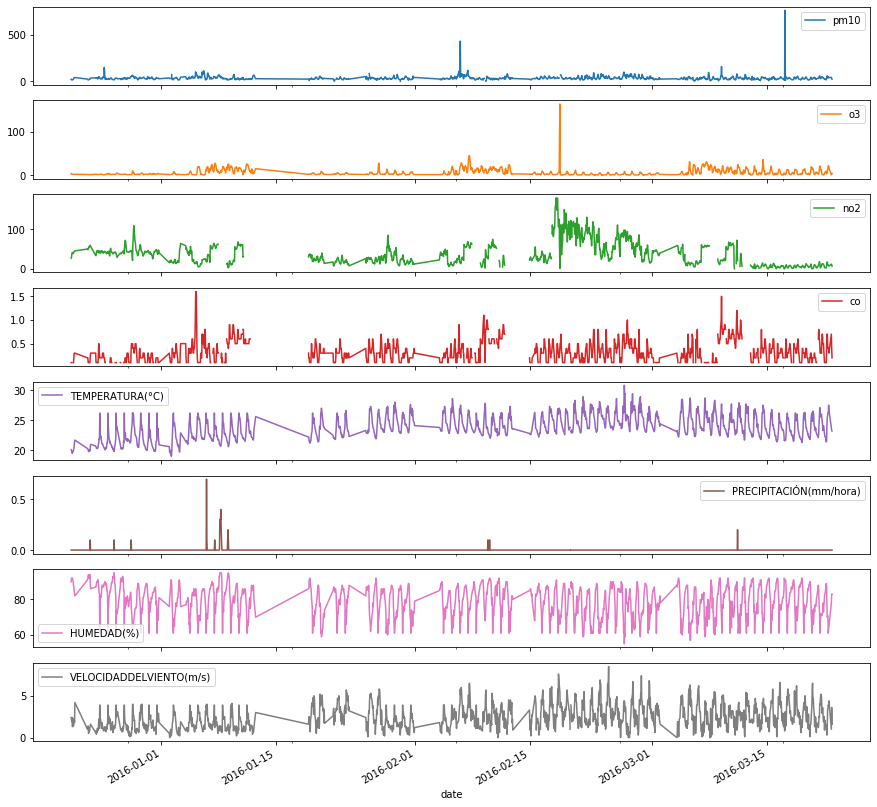

In [133]:
#Eliminamos las columnas que contengan más del 20% de datos nulos
summer_2016 = summer_2016.drop(['so2','pm25','DIRECCIONDELVIENTO(°)'], 1)
summer_2016.plot(subplots = True, figsize = (15,15))
plt.show()

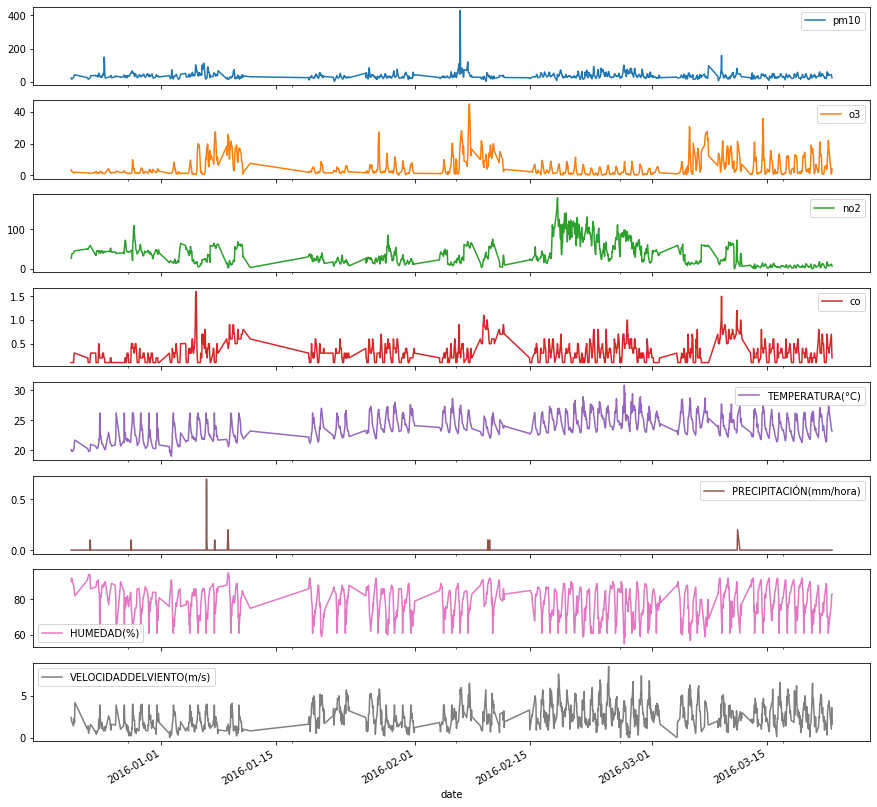

In [134]:
# Eliminando registros con NA para obtener un rango más estricto a evaluar
com_sm_2016 = summer_2016[~np.isnan(summer_2016).any(axis=1)]
com_sm_2016.plot(subplots = True, figsize = (15,15))
plt.savefig('data_2016.png', bbox = 'tight')
plt.show()

In [135]:
com_sm_2016.corr()

,pm10,o3,no2,co,TEMPERATURA(°C),PRECIPITACIÓN(mm/hora),HUMEDAD(%),VELOCIDADDELVIENTO(m/s)
pm10,1.000000,-0.004295,0.093317,0.336312,0.147963,-0.022660,-0.147981,0.037401
o3,-0.004295,1.000000,-0.110277,0.063085,0.309705,0.113075,-0.282699,0.333933
no2,0.093317,-0.110277,1.000000,0.031201,0.164390,-0.029013,-0.076612,-0.004044
co,0.336312,0.063085,0.031201,1.000000,0.132512,0.022842,-0.077538,0.000291
TEMPERATURA(°C),0.147963,0.309705,0.164390,0.132512,1.000000,-0.026364,-0.819239,0.642620
PRECIPITACIÓN(mm/hora),-0.022660,0.113075,-0.029013,0.022842,-0.026364,1.000000,0.019565,-0.013800
HUMEDAD(%),-0.147981,-0.282699,-0.076612,-0.077538,-0.819239,0.019565,1.000000,-0.557527
VELOCIDADDELVIENTO(m/s),0.037401,0.333933,-0.004044,0.000291,0.642620,-0.013800,-0.557527,1.000000


# Summer 2017

In [136]:
fecha_4 = pd.to_datetime(20173222300, format='%Y%m%d%H%M%S')
fecha_3 = pd.to_datetime(20161221000, format='%Y%m%d%H%M%S')
summer_2017 = data.loc[str(fecha_3):str(fecha_4)]

In [50]:
summer_2017['TEMPERATURA(°C)'].mean()

24.789608938547484

In [137]:
summer_2017 = summer_2017.drop(['DIRECCIONDELVIENTO(°)'], 1)

In [138]:
dist_na(summer_2017)

,NA,Percent
co,162,18.100559
no2,90,10.055866
pm25,74,8.268156
so2,70,7.821229
pm10,40,4.469274
o3,1,0.111732
TEMPERATURA(°C),0,0.000000
PRECIPITACIÓN(mm/hora),0,0.000000
HUMEDAD(%),0,0.000000
VELOCIDADDELVIENTO(m/s),0,0.000000


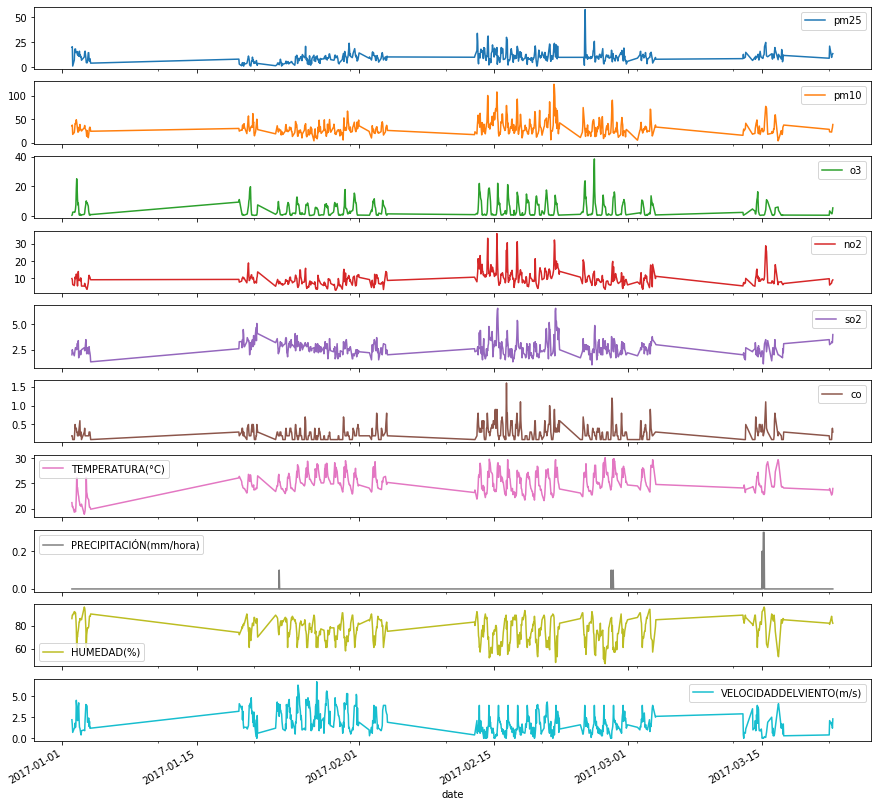

In [139]:
com_sm_2017 = summer_2017[~np.isnan(summer_2017).any(axis=1)]
com_sm_2017.plot(subplots = True, figsize = (15,15))
plt.savefig('data_2017.png', bbox = 'tight')
plt.show()

In [53]:
com_sm_2017.corr()

,pm25,pm10,o3,no2,so2,co,TEMPERATURA(°C),PRECIPITACIÓN(mm/hora),HUMEDAD(%),DIRECCIONDELVIENTO(°),VELOCIDADDELVIENTO(m/s)
pm25,1.000000,0.407250,0.156044,0.409222,0.059998,0.382832,-0.058025,0.007620,0.006242,-0.059443,-0.222660
pm10,0.407250,1.000000,0.023501,0.762125,0.344920,0.710463,0.008177,-0.031711,-0.046835,0.007504,-0.264229
o3,0.156044,0.023501,1.000000,0.103928,0.292103,-0.108517,0.527389,-0.040587,-0.568941,-0.196956,0.427299
no2,0.409222,0.762125,0.103928,1.000000,0.346332,0.693874,0.036801,-0.022956,-0.069055,-0.009855,-0.283939
so2,0.059998,0.344920,0.292103,0.346332,1.000000,0.294077,0.325422,-0.078079,-0.345353,-0.054793,0.107236
co,0.382832,0.710463,-0.108517,0.693874,0.294077,1.000000,-0.037221,0.000468,0.043814,-0.053783,-0.248595
TEMPERATURA(°C),-0.058025,0.008177,0.527389,0.036801,0.325422,-0.037221,1.000000,-0.056761,-0.827472,-0.108485,0.455577
PRECIPITACIÓN(mm/hora),0.007620,-0.031711,-0.040587,-0.022956,-0.078079,0.000468,-0.056761,1.000000,0.113280,0.174350,-0.099855
HUMEDAD(%),0.006242,-0.046835,-0.568941,-0.069055,-0.345353,0.043814,-0.827472,0.113280,1.000000,0.143746,-0.400537
DIRECCIONDELVIENTO(°),-0.059443,0.007504,-0.196956,-0.009855,-0.054793,-0.053783,-0.108485,0.174350,0.143746,1.000000,-0.143965


# Summer 2018

In [145]:
import matplotlib.pyplot as plt
fecha_6 = pd.to_datetime(20183222300, format='%Y%m%d%H%M%S')
fecha_5 = pd.to_datetime(20171221000, format='%Y%m%d%H%M%S')
summer_2018 = data.loc[str(fecha_5):str(fecha_6)]

In [141]:
summer_2018['TEMPERATURA(°C)'].mean()

22.25794223826715

In [146]:
dist_na(summer_2018)

,NA,Percent
so2,1663,100.000000
o3,464,27.901383
no2,198,11.906194
co,138,8.298256
pm25,86,5.171377
pm10,10,0.601323
PRECIPITACIÓN(mm/hora),2,0.120265
DIRECCIONDELVIENTO(°),2,0.120265
VELOCIDADDELVIENTO(m/s),2,0.120265
TEMPERATURA(°C),1,0.060132


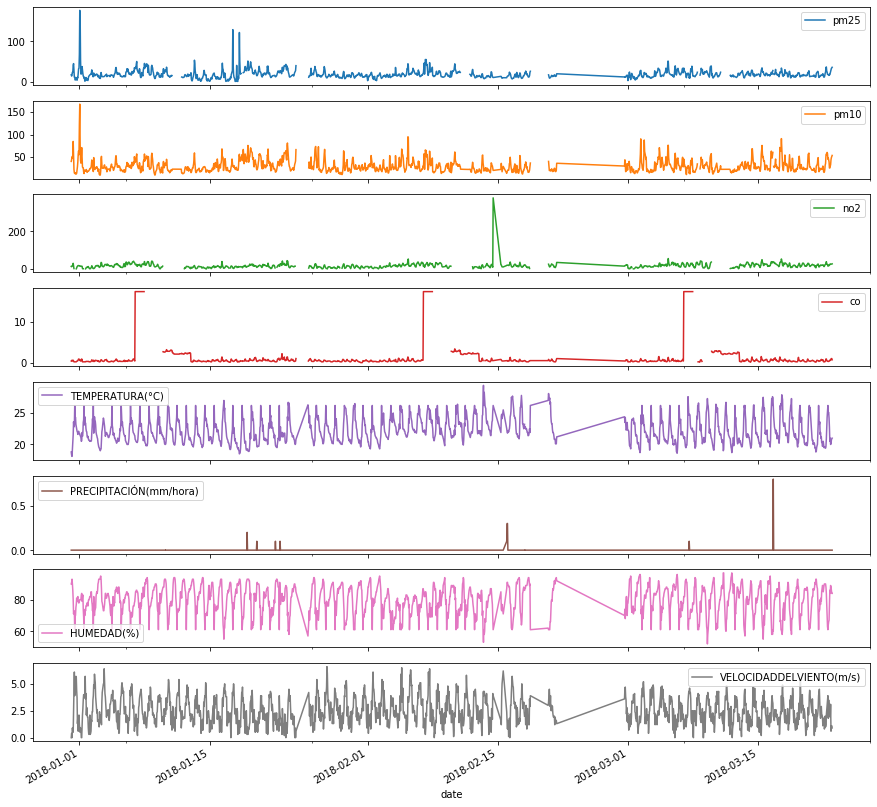

In [149]:
#Eliminamos las columnas que contengan más del 20% de datos nulos
summer_2018 = summer_2018.drop(['o3','so2','DIRECCIONDELVIENTO(°)'], 1)
summer_2018.plot(subplots = True, figsize = (15,15))
plt.show()

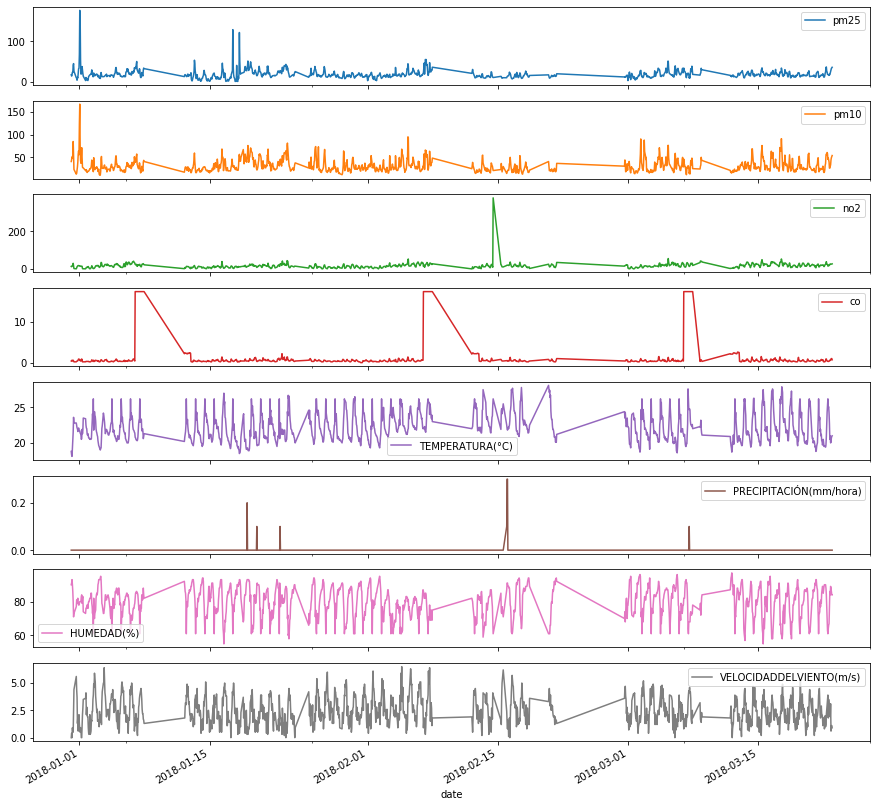

In [153]:
com_sm_2018 = summer_2018[~np.isnan(summer_2018).any(axis=1)]
com_sm_2018.plot(subplots = True, figsize = (15,15))
plt.savefig('data_2018.png', bbox = 'tight')
plt.show()

In [151]:
com_sm_2018.corr()

,pm25,pm10,no2,co,TEMPERATURA(°C),PRECIPITACIÓN(mm/hora),HUMEDAD(%),VELOCIDADDELVIENTO(m/s)
pm25,1.000000,0.698919,0.227313,0.196329,-0.077304,-0.004837,0.051571,-0.199416
pm10,0.698919,1.000000,0.314145,0.071822,0.108115,-0.024661,-0.139502,-0.106042
no2,0.227313,0.314145,1.000000,0.104548,0.099785,0.003567,-0.113334,-0.059575
co,0.196329,0.071822,0.104548,1.000000,0.062081,0.006603,-0.049275,0.008314
TEMPERATURA(°C),-0.077304,0.108115,0.099785,0.062081,1.000000,-0.020507,-0.930015,0.652151
PRECIPITACIÓN(mm/hora),-0.004837,-0.024661,0.003567,0.006603,-0.020507,1.000000,0.061853,-0.051689
HUMEDAD(%),0.051571,-0.139502,-0.113334,-0.049275,-0.930015,0.061853,1.000000,-0.618461
VELOCIDADDELVIENTO(m/s),-0.199416,-0.106042,-0.059575,0.008314,0.652151,-0.051689,-0.618461,1.000000


# Summer 2019

In [154]:
fecha_8 = pd.to_datetime(20193222300, format='%Y%m%d%H%M%S')
fecha_7 = pd.to_datetime(20181221000, format='%Y%m%d%H%M%S')
summer_2019 = data.loc[str(fecha_7):str(fecha_8)]

In [61]:
summer_2019['TEMPERATURA(°C)'].mean()

23.694202226345084

In [155]:
dist_na(summer_2019)

,NA,Percent
so2,2158,100.000000
o3,1727,80.027804
co,365,16.913809
no2,276,12.789620
pm25,13,0.602410
pm10,13,0.602410
PRECIPITACIÓN(mm/hora),4,0.185357
DIRECCIONDELVIENTO(°),4,0.185357
VELOCIDADDELVIENTO(m/s),4,0.185357
TEMPERATURA(°C),2,0.092678


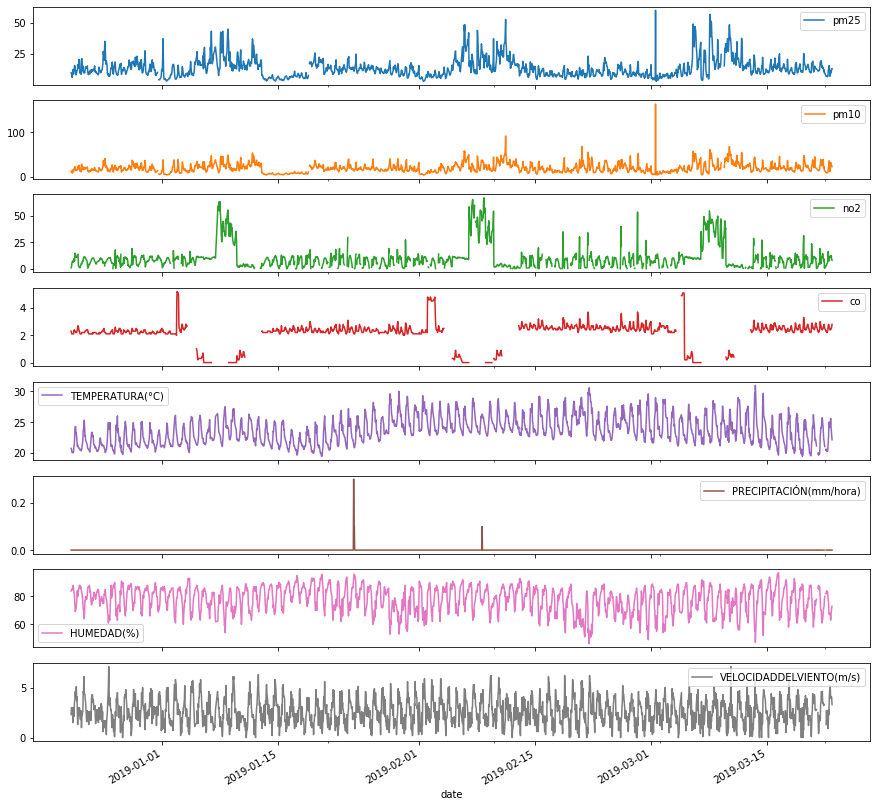

In [157]:
summer_2019 = summer_2019.drop(['o3','so2','DIRECCIONDELVIENTO(°)'], 1)
summer_2019.plot(subplots = True, figsize = (15,15))
plt.show()

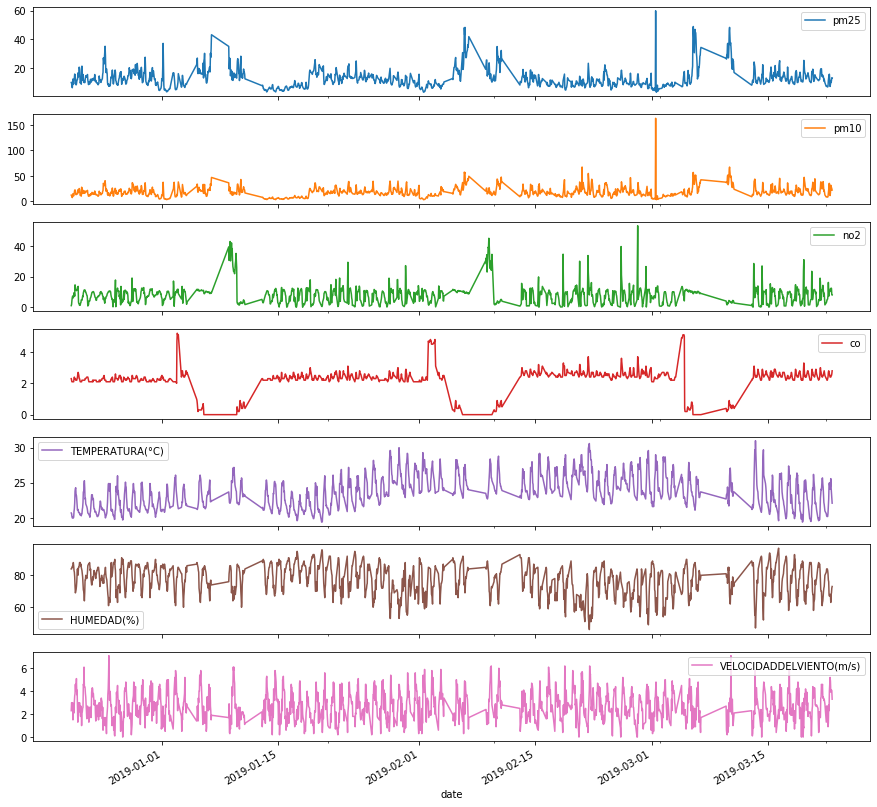

In [158]:
com_sm_2019 = summer_2019[~np.isnan(summer_2019).any(axis=1)]
com_sm_2019 = com_sm_2019.drop(['PRECIPITACIÓN(mm/hora)'],1)
com_sm_2019.plot(subplots = True, figsize = (15,15))
plt.savefig('data_2019.png', bbox = 'tight')
plt.show()

In [65]:
com_sm_2019.corr()

,pm25,pm10,no2,co,TEMPERATURA(°C),HUMEDAD(%),DIRECCIONDELVIENTO(°),VELOCIDADDELVIENTO(m/s)
pm25,1.000000,0.853290,0.101615,-0.472269,-0.038965,0.082563,0.029926,-0.148193
pm10,0.853290,1.000000,0.098240,-0.234637,0.236780,-0.233147,-0.001520,0.022727
no2,0.101615,0.098240,1.000000,-0.212688,0.261415,-0.262031,-0.006040,0.210902
co,-0.472269,-0.234637,-0.212688,1.000000,0.020748,-0.081131,0.017756,0.032023
TEMPERATURA(°C),-0.038965,0.236780,0.261415,0.020748,1.000000,-0.871227,-0.062177,0.525827
HUMEDAD(%),0.082563,-0.233147,-0.262031,-0.081131,-0.871227,1.000000,0.059852,-0.539467
DIRECCIONDELVIENTO(°),0.029926,-0.001520,-0.006040,0.017756,-0.062177,0.059852,1.000000,-0.247436
VELOCIDADDELVIENTO(m/s),-0.148193,0.022727,0.210902,0.032023,0.525827,-0.539467,-0.247436,1.000000


# Summer 2020

In [159]:
fecha_10 = pd.to_datetime(20203222300, format='%Y%m%d%H%M%S')
fecha_9 = pd.to_datetime(20191221000, format='%Y%m%d%H%M%S')
summer_2020 = data.loc[str(fecha_9):str(fecha_10)]

In [67]:
summer_2020['TEMPERATURA(°C)'].mean()

23.202512998266897

In [160]:
dist_na(summer_2020)

,NA,Percent
so2,1155,100.000000
o3,814,70.476190
co,338,29.264069
no2,16,1.385281
pm25,1,0.086580
pm10,1,0.086580
TEMPERATURA(°C),1,0.086580
PRECIPITACIÓN(mm/hora),0,0.000000
HUMEDAD(%),0,0.000000
DIRECCIONDELVIENTO(°),0,0.000000


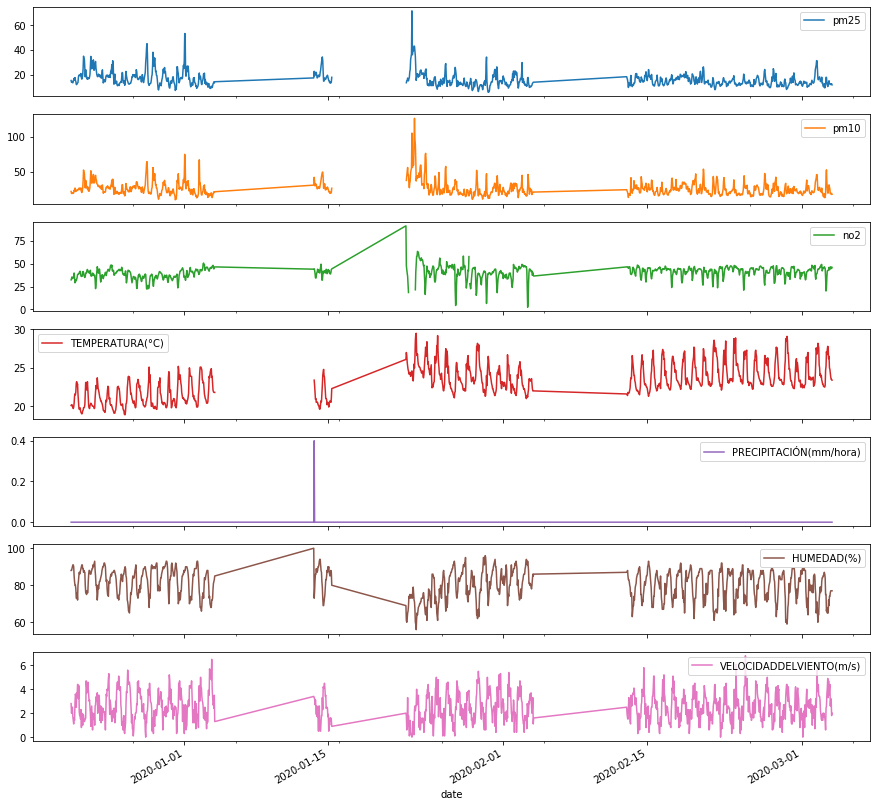

In [163]:
summer_2020 = summer_2020.drop(['o3','so2', 'co', 'DIRECCIONDELVIENTO(°)'], 1)
summer_2020.plot(subplots = True, figsize = (15,15))
plt.show()

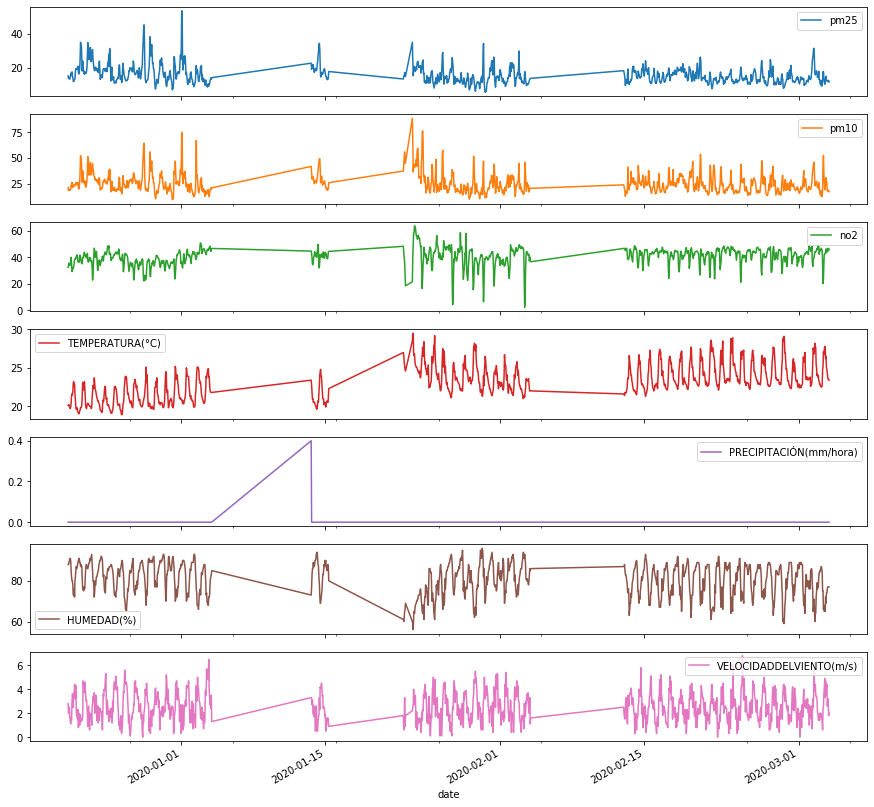

In [164]:
# Eliminamos los np.nan por filas
com_sm_2020 = summer_2020[~np.isnan(summer_2020).any(axis=1)]
com_sm_2020.plot(subplots = True, figsize = (15,15))
plt.savefig('data_2020.png', bbox = 'tight')
plt.show()

In [71]:
com_sm_2020.corr()

,pm25,pm10,no2,TEMPERATURA(°C),PRECIPITACIÓN(mm/hora),HUMEDAD(%),DIRECCIONDELVIENTO(°),VELOCIDADDELVIENTO(m/s)
pm25,1.000000,0.785152,-0.239054,-0.279088,0.039096,0.174795,0.087139,-0.220343
pm10,0.785152,1.000000,-0.276492,0.154305,0.052573,-0.269938,-0.022473,0.009423
no2,-0.239054,-0.276492,1.000000,0.071819,0.019273,-0.015291,0.047942,-0.037019
TEMPERATURA(°C),-0.279088,0.154305,0.071819,1.000000,0.003007,-0.840148,-0.165587,0.453614
PRECIPITACIÓN(mm/hora),0.039096,0.052573,0.019273,0.003007,1.000000,-0.029289,-0.042067,0.019392
HUMEDAD(%),0.174795,-0.269938,-0.015291,-0.840148,-0.029289,1.000000,0.167221,-0.560311
DIRECCIONDELVIENTO(°),0.087139,-0.022473,0.047942,-0.165587,-0.042067,0.167221,1.000000,-0.355178
VELOCIDADDELVIENTO(m/s),-0.220343,0.009423,-0.037019,0.453614,0.019392,-0.560311,-0.355178,1.000000


## Correlation of variables

In [124]:
prom_albedo = [0.155723,0.138726,0.156741,0.146874,0.147179]
prom_ndvi = [0.152677, 0.183293,0.141464,0.130163, 0.229783]
prom_st = [23.497023, 29.725039, 24.996693, 25.978226, 27.408743]
prom_temp = [23.899045915324983,24.789608938547484,22.25794223826715,23.694202226345084,23.202512998266897]
temperature = pd.DataFrame([prom_albedo,prom_ndvi,prom_st,prom_temp], columns = list(range(2016,2021)), index = ['Surface Albedo', 'NDVI','Surface Temp', 'Temp'])

In [125]:
temperature.transpose().corr()

,Surface Albedo,NDVI,Surface Temp,Temp
Surface Albedo,1.000000,-0.420032,-0.931212,-0.729097
NDVI,-0.420032,1.000000,0.552791,0.140869
Surface Temp,-0.931212,0.552791,1.000000,0.510125
Temp,-0.729097,0.140869,0.510125,1.000000


# Linear Regression

## For Summer 2016

In [223]:
y = com_sm_2016['TEMPERATURA(°C)']
x = com_sm_2016[['pm10','o3','no2','co',
               'PRECIPITACIÓN(mm/hora)','HUMEDAD(%)','VELOCIDADDELVIENTO(m/s)']]

In [224]:
from sklearn.linear_model import LinearRegression 
linear_regression = LinearRegression()
multreg = linear_regression.fit(x,y)

In [225]:
multreg.score(x,y)

0.7405301503789284

In [226]:
multreg.coef_

array([ 7.04957419e-04,  1.43740507e-02,  7.95277492e-03,  6.37578837e-01,
       -1.14658764e+00, -1.41531937e-01,  3.60929366e-01])

In [227]:
multreg.intercept_

33.61019505899898

In [234]:
print(('Summer 2016 {} = {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {}').format('TEMPERATURA(°C)', round(multreg.intercept_,4), 
                                                                                       round(multreg.coef_[0],4),'pm10',round(multreg.coef_[1],4),'o3',
                                                                                       round(multreg.coef_[2],4),'no2',round(multreg.coef_[3],4),'co',
                                                                                       round(multreg.coef_[4],4),'PRECIPITACIÓN(mm/hora)',round(multreg.coef_[5],4),'HUMEDAD(%)',
                                                                                       round(multreg.coef_[6],4),'VELOCIDADDELVIENTO(m/s)'))

Summer 2016 TEMPERATURA(°C) = 33.6102 + 0.0007 * pm10 + 0.0144 * o3 + 0.008 * no2 + 0.6376 * co + -1.1466 * PRECIPITACIÓN(mm/hora) + -0.1415 * HUMEDAD(%) + 0.3609 * VELOCIDADDELVIENTO(m/s)


## For Summer 2017

In [166]:
y = com_sm_2017['TEMPERATURA(°C)']
x = com_sm_2017[['pm25','pm10','o3','no2','so2','co',
               'PRECIPITACIÓN(mm/hora)','HUMEDAD(%)','VELOCIDADDELVIENTO(m/s)']]

In [167]:
from sklearn.linear_model import LinearRegression 
linear_regression = LinearRegression()
multreg = linear_regression.fit(x,y)

In [168]:
multreg.score(x,y)

0.7110068408717127

In [169]:
multreg.coef_

array([-1.79348073e-02, -4.50318583e-03,  2.17631186e-02,  5.91580754e-03,
        1.00543910e-01,  6.14192901e-01,  4.71587995e+00, -1.50903806e-01,
        2.18351839e-01])

In [170]:
multreg.intercept_

35.957382594073174

In [173]:
print(('Summer 2017 {} = {} + {} * {} + {} * {} + {} * {} +  {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {}').format('TEMPERATURA(°C)', round(multreg.intercept_,4), 
                                                                                                                           round(multreg.coef_[0],4),'pm25',                    
                                                                                                                           round(multreg.coef_[1],4),'pm10',round(multreg.coef_[2],4),'o3',
                                                                                                                           round(multreg.coef_[3],4),'no2',round(multreg.coef_[4],4),'so2',
                                                                                                                           round(multreg.coef_[5],4),'co',
                                                                                                                           round(multreg.coef_[6],4),'PRECIPITACIÓN(mm/hora)',round(multreg.coef_[7],4),'HUMEDAD(%)',
                                                                                                                           round(multreg.coef_[8],4),'VELOCIDADDELVIENTO(m/s)'))

Summer 2017 TEMPERATURA(°C) = 35.9574 + -0.0179 * pm25 + -0.0045 * pm10 + 0.0218 * o3 +  0.0059 * no2 + 0.1005 * so2 + 0.6142 * co + 4.7159 * PRECIPITACIÓN(mm/hora) + -0.1509 * HUMEDAD(%) + 0.2184 * VELOCIDADDELVIENTO(m/s)


## For Summer 2018

In [174]:
y = com_sm_2018['TEMPERATURA(°C)']
x = com_sm_2018[['pm25','pm10','no2','co',
               'PRECIPITACIÓN(mm/hora)','HUMEDAD(%)','VELOCIDADDELVIENTO(m/s)']]

In [175]:
from sklearn.linear_model import LinearRegression 
linear_regression = LinearRegression()
multreg = linear_regression.fit(x,y)

In [176]:
multreg.score(x,y)

0.8768198001594641

In [177]:
multreg.coef_

array([-4.96260874e-03,  2.69751092e-03,  1.31483425e-03,  1.11676573e-02,
        5.37864475e+00, -1.85599916e-01,  1.97916143e-01])

In [178]:
multreg.intercept_

36.48448067326505

In [179]:
print(('Summer 2018 {} = {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {}').format('TEMPERATURA(°C)', round(multreg.intercept_,4), 
                                                                                       round(multreg.coef_[0],4),'pm25',round(multreg.coef_[1],4),'pm10',
                                                                                       round(multreg.coef_[2],4),'no2',round(multreg.coef_[3],4),'co',
                                                                                       round(multreg.coef_[4],4),'PRECIPITACIÓN(mm/hora)',round(multreg.coef_[5],4),'HUMEDAD(%)',
                                                                                       round(multreg.coef_[6],4),'VELOCIDADDELVIENTO(m/s)'))

Summer 2018 TEMPERATURA(°C) = 36.4845 + -0.005 * pm25 + 0.0027 * pm10 + 0.0013 * no2 + 0.0112 * co + 5.3786 * PRECIPITACIÓN(mm/hora) + -0.1856 * HUMEDAD(%) + 0.1979 * VELOCIDADDELVIENTO(m/s)


## For Summer 2019

In [181]:
y = com_sm_2019['TEMPERATURA(°C)']
x = com_sm_2019[['pm25','pm10','no2','co',
               'HUMEDAD(%)','VELOCIDADDELVIENTO(m/s)']]

In [182]:
from sklearn.linear_model import LinearRegression 
linear_regression = LinearRegression()
multreg = linear_regression.fit(x,y)

In [183]:
multreg.score(x,y)

0.7675845408209989

In [184]:
multreg.coef_

array([-0.01958726,  0.01857845,  0.00806617, -0.12676982, -0.19816858,
        0.14408034])

In [185]:
multreg.intercept_

38.648846697747985

In [187]:
print(('Summer 2019 {} = {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {}').format('TEMPERATURA(°C)', round(multreg.intercept_,4), 
                                                                                       round(multreg.coef_[0],4),'pm25',round(multreg.coef_[1],4),'pm10',
                                                                                       round(multreg.coef_[2],4),'no2',round(multreg.coef_[3],4),'co',
                                                                                       round(multreg.coef_[4],4),'HUMEDAD(%)',
                                                                                       round(multreg.coef_[5],4),'VELOCIDADDELVIENTO(m/s)'))

Summer 2019 TEMPERATURA(°C) = 38.6488 + -0.0196 * pm25 + 0.0186 * pm10 + 0.0081 * no2 + -0.1268 * co + -0.1982 * HUMEDAD(%) + 0.1441 * VELOCIDADDELVIENTO(m/s)


## For Summer 2020

In [190]:
y = com_sm_2020['TEMPERATURA(°C)']
x = com_sm_2020[['pm25','pm10','no2',
               'HUMEDAD(%)','PRECIPITACIÓN(mm/hora)','VELOCIDADDELVIENTO(m/s)']]

In [191]:
from sklearn.linear_model import LinearRegression 
linear_regression = LinearRegression()
multreg = linear_regression.fit(x,y)

In [192]:
multreg.score(x,y)

0.734826709677951

In [193]:
multreg.coef_

array([-0.12420561,  0.04693405,  0.01417081, -0.2055211 , -3.26246419,
       -0.06265269])

In [194]:
multreg.intercept_

40.14507965928648

In [195]:
print(('Summer 2020 {} = {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {} * {}').format('TEMPERATURA(°C)', round(multreg.intercept_,4), 
                                                                                       round(multreg.coef_[0],4),'pm25',round(multreg.coef_[1],4),'pm10',
                                                                                       round(multreg.coef_[2],4),'no2',
                                                                                       round(multreg.coef_[3],4),'HUMEDAD(%)', round(multreg.coef_[4],4),'PRECIPITACIÓN(mm/hora)',
                                                                                       round(multreg.coef_[5],4),'VELOCIDADDELVIENTO(m/s)'))

Summer 2020 TEMPERATURA(°C) = 40.1451 + -0.1242 * pm25 + 0.0469 * pm10 + 0.0142 * no2 + -0.2055 * HUMEDAD(%) + -3.2625 * PRECIPITACIÓN(mm/hora) + -0.0627 * VELOCIDADDELVIENTO(m/s)
